<a href="https://colab.research.google.com/github/krishnavarathan/python-data-analysis/blob/main/MAGIC_Gamma_Telescope_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=['fLength', 'fWidth', 'fSize', 'fConc','fConc1' ,'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df=pd.read_csv('/content/drive/MyDrive/Machine Learninng/magic+gamma+telescope/magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# These are the predicted final values
pd.unique(df.values[:,-1])

array(['g', 'h'], dtype=object)

In [4]:
# converting the g and h into 1 and 0
df['class']= (df['class'] == 'g').astype(int)

In [5]:

df['class'].unique()

array([1, 0])

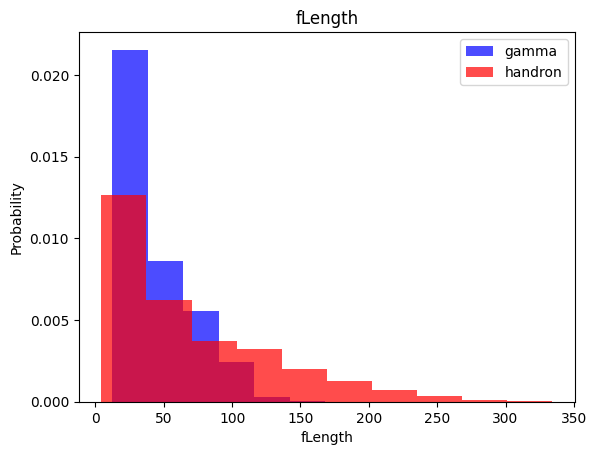

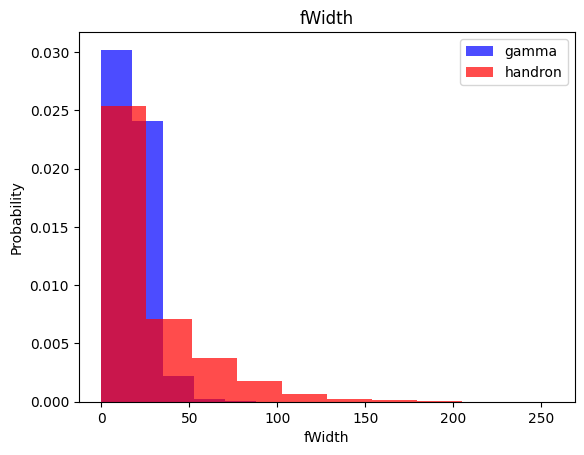

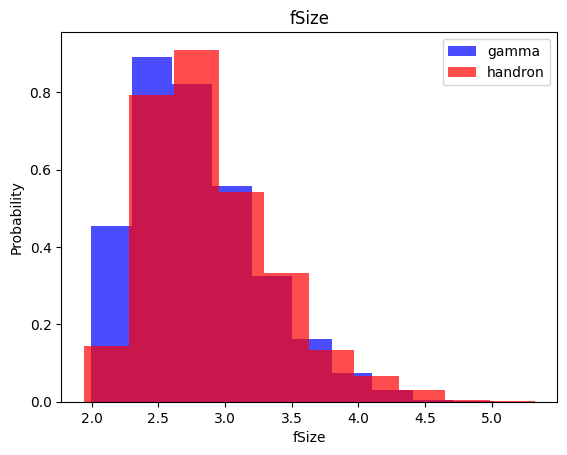

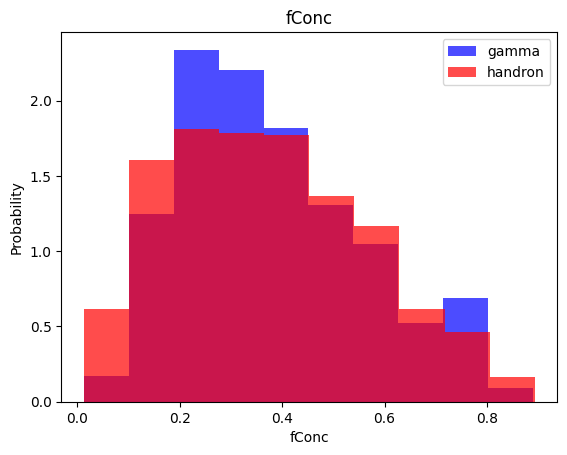

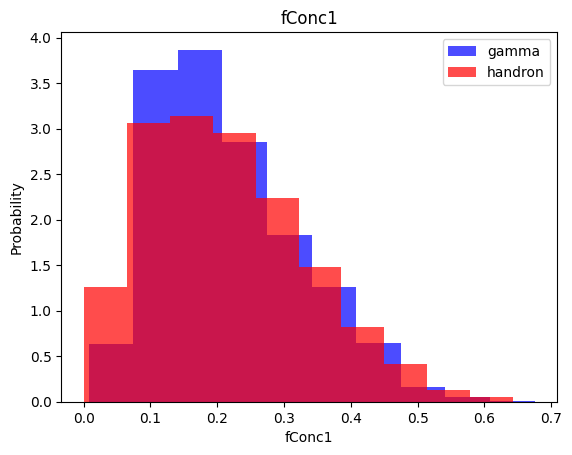

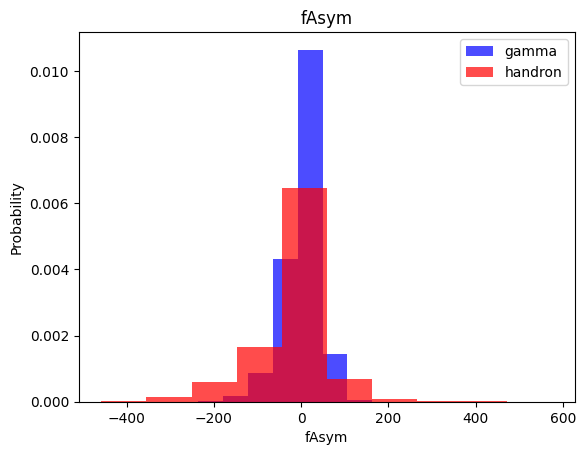

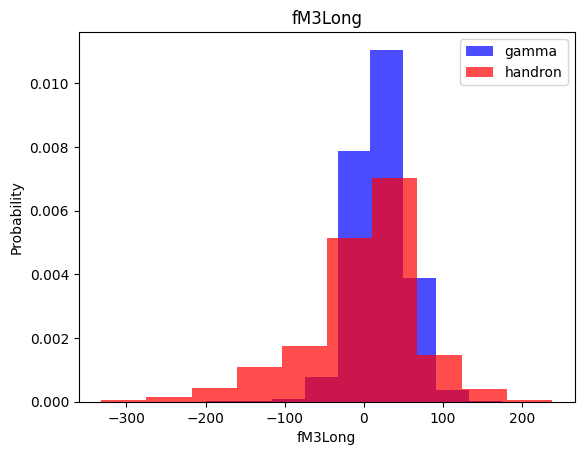

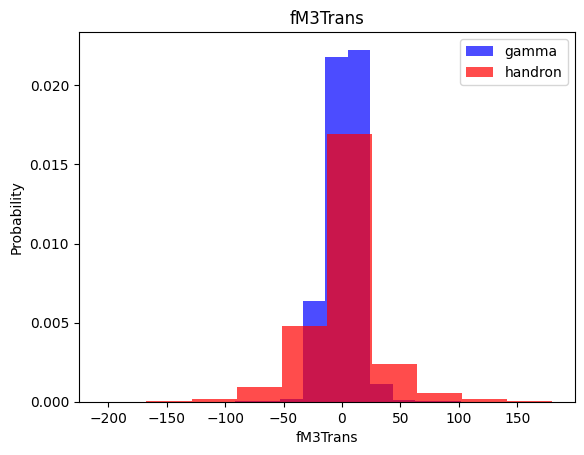

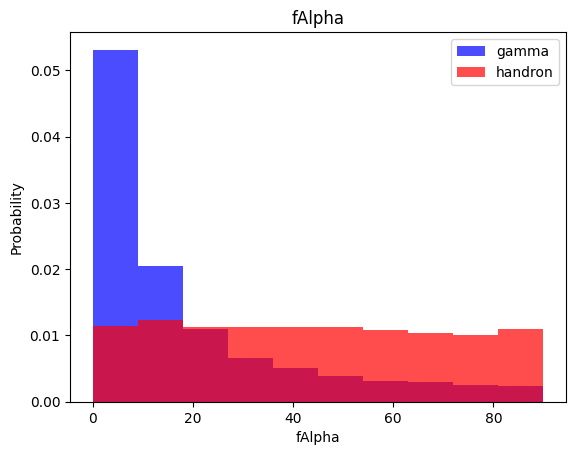

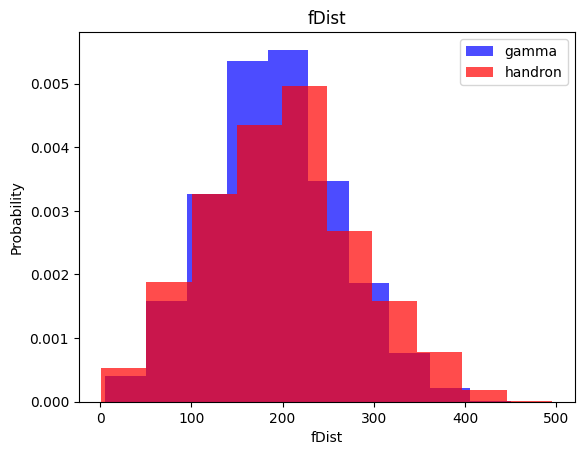

In [6]:
# Plotting them into plt
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='handron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Train Validation Test Dat-Set

In [7]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [8]:
# np.split() => split the data horizandle-wise
# .sample(frc=1) => it shuffle the over data-set by rows
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# print(test, valid)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
# hardon value very low compare to gamma
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hardon

7384
4028


In [10]:
print(train.shape)
print(valid.shape)
print(test.shape)

(11412, 11)
(3804, 11)
(3804, 11)


Normalize and Pre-Processing the data-set using **StandardScaler() and RandomOverSampler()**

In [11]:
# dataframe.columns[:-1] => Taking the all columns expect last one('class')
# dataframe[dataframe.columns[:-1]].values => taking the all column values
def scale_dataset(dataframe, over_sample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  # print("X size:", len(X))
  # print("y size:", len(y))

  # Normalize the feature input data
  scaler=StandardScaler()
  X = scaler.fit_transform(X)

  if over_sample:
    ros=RandomOverSampler()
    X, y=ros.fit_resample(X, y)
    # print("X size:", len(X))
    # print("y size:", len(y))


  # fitting the resample data which is X and
  data = np.hstack((X, np.reshape(y, (-1, 1)))) # changing 1D array into 2-D array (-1) tells no.of rows, (1) tells one no.of column

  return data, X, y

Passing the train, valid, test data-sets and
stored the output corresponding variables

In [12]:
train, X_train, y_train = scale_dataset(train, over_sample=True)
valid, X_valid, y_valid = scale_dataset(valid, over_sample=False)
test, X_test, y_test = scale_dataset(test, over_sample=False)

In [13]:
print(train.shape)
print(X_train.shape)
print(y_train.shape)

(14768, 11)
(14768, 10)
(14768,)


In [14]:
print(y_train)
print(y_valid)
print(y_test)

[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 0 1 1]


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
# .fit() does in KNN
# Unlike other algorithms, KNN does not calculate equations.
# It simply stores the training data in memory.

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Passing the training data-set as input feautures
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1317
           1       0.86      0.85      0.86      2487

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804

Accuracy: 0.814143007360673


In [18]:
# print(type(y_pred))
# print(type(y_train))
# print(len(y_pred))
# print(len(y_train))

# Observing the output
print(len(X_train))
print(np.unique(y_pred, return_counts=True))
print(np.unique(y_train, return_counts=True))

14768
(array([0, 1]), array([1356, 2448]))
(array([0, 1]), array([7384, 7384]))


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train, y_train)

In [21]:
y_pred_nb=nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1317
           1       0.74      0.90      0.81      2487

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804

Accuracy: 0.7287066246056783


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [24]:
y_pred_lg=lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))
print("Accuracy:", accuracy_score(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1317
           1       0.85      0.82      0.84      2487

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804

Accuracy: 0.7883806519453207


# SVM

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model=SVC()
svm_model = svm_model.fit(X_train, y_train)

In [27]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1317
           1       0.90      0.89      0.89      2487

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Accuracy: 0.8614616193480547


# Neural Network

In [29]:
import tensorflow as tf

In [30]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [31]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), # to controll the overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob), # to controll the overfitting
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


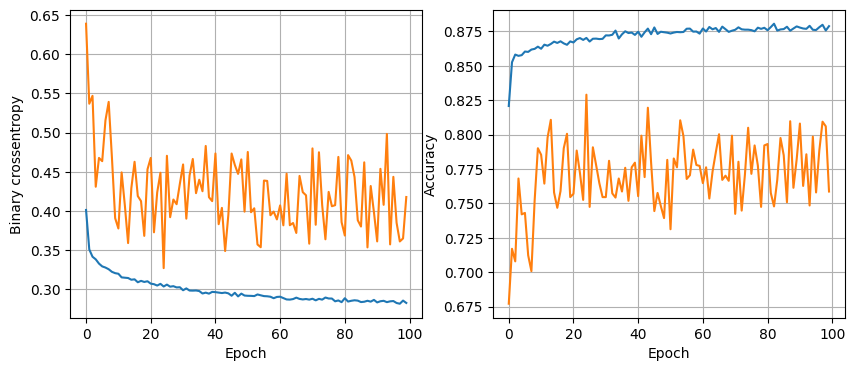

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3276
16 nodes, dropout 0, lr 0.01, batch size 64


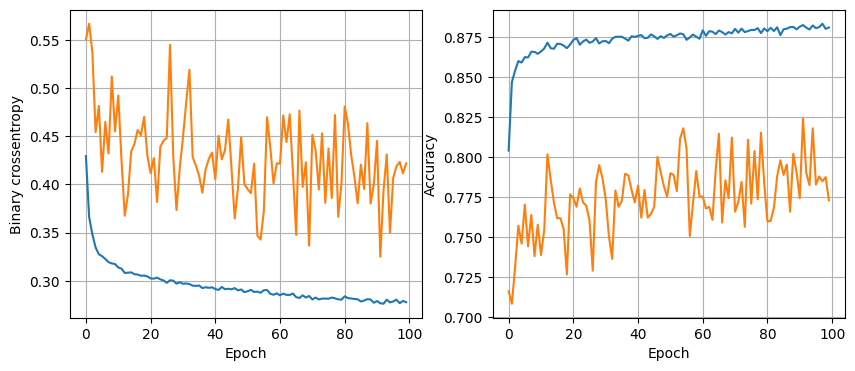

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3275
16 nodes, dropout 0, lr 0.01, batch size 128


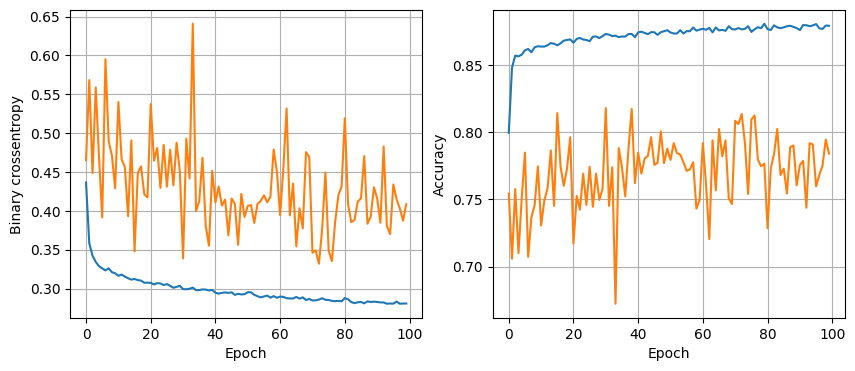

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3112
16 nodes, dropout 0, lr 0.005, batch size 32


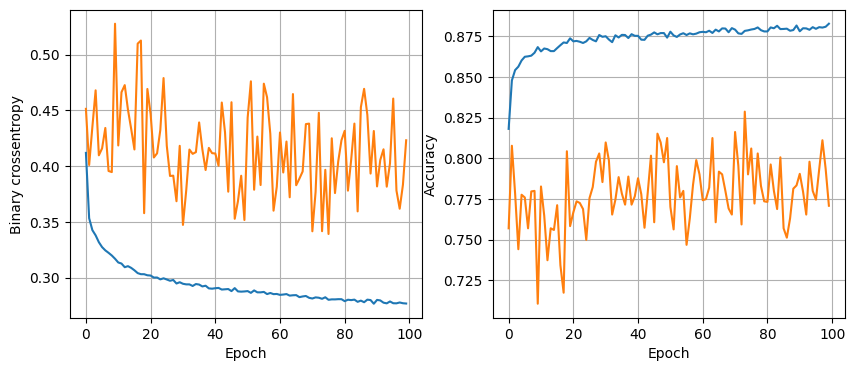

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3375
16 nodes, dropout 0, lr 0.005, batch size 64


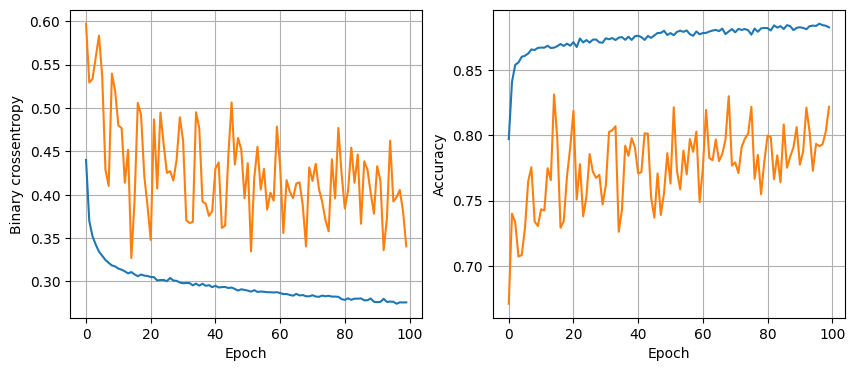

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.3107
16 nodes, dropout 0, lr 0.005, batch size 128


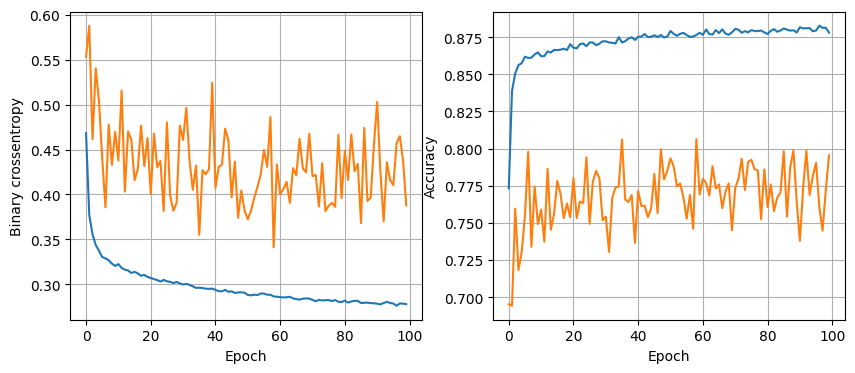

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8671 - loss: 0.3211
16 nodes, dropout 0, lr 0.001, batch size 32


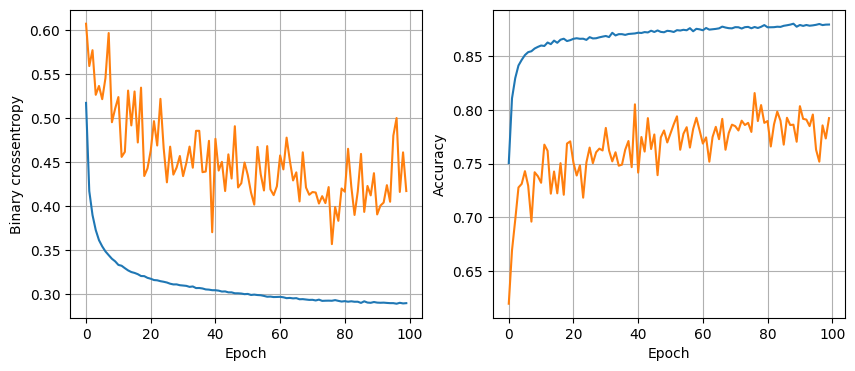

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3142
16 nodes, dropout 0, lr 0.001, batch size 64


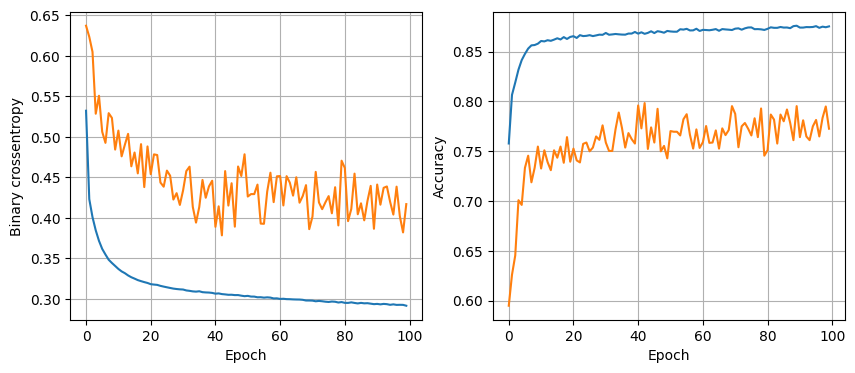

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3155
16 nodes, dropout 0, lr 0.001, batch size 128


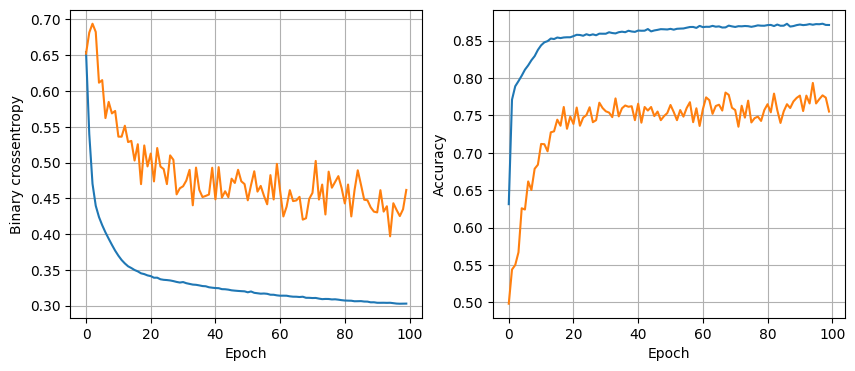

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3179
16 nodes, dropout 0.2, lr 0.01, batch size 32


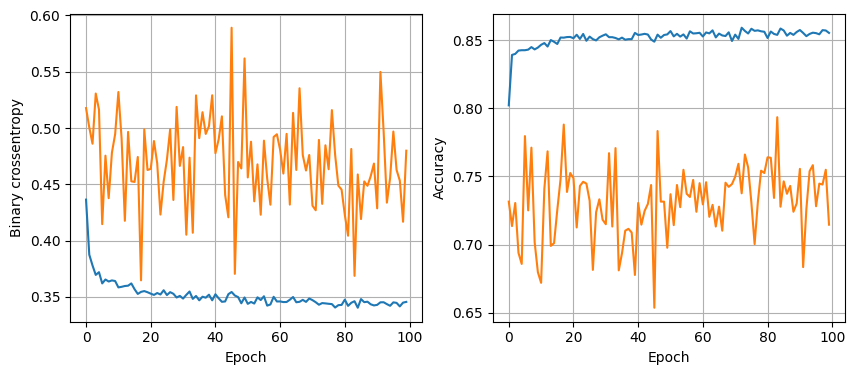

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8703 - loss: 0.3212
16 nodes, dropout 0.2, lr 0.01, batch size 64


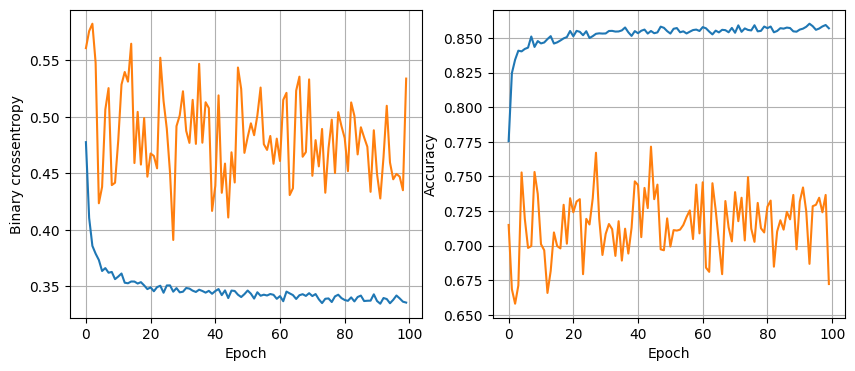

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3242
16 nodes, dropout 0.2, lr 0.01, batch size 128


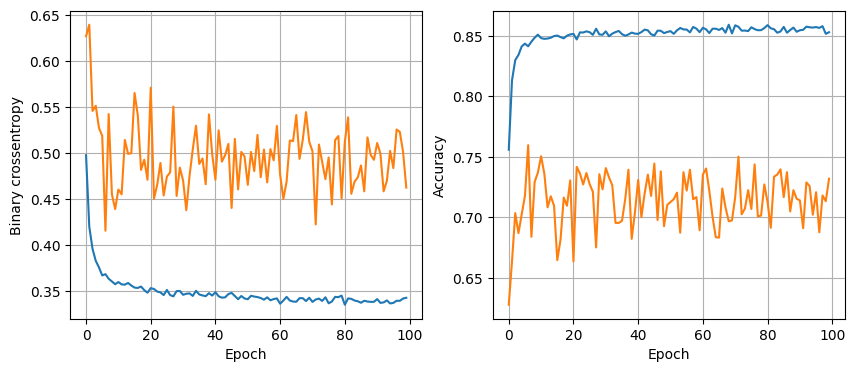

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3232
16 nodes, dropout 0.2, lr 0.005, batch size 32


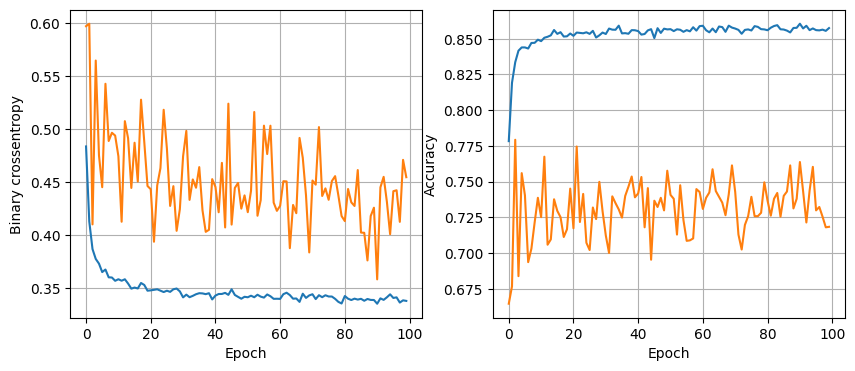

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8633 - loss: 0.3241
16 nodes, dropout 0.2, lr 0.005, batch size 64


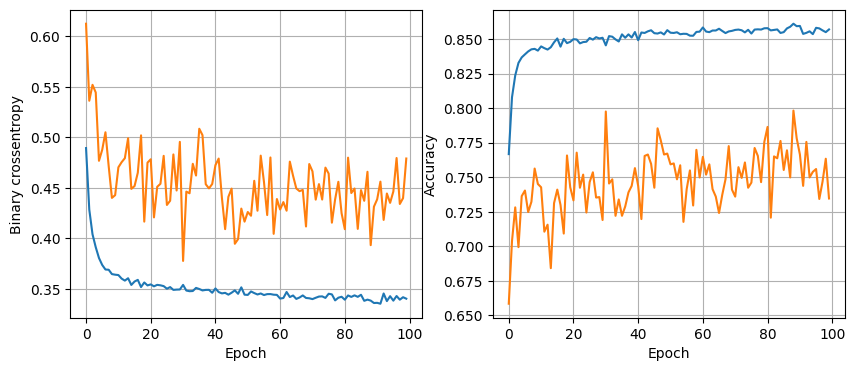

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3148
16 nodes, dropout 0.2, lr 0.005, batch size 128


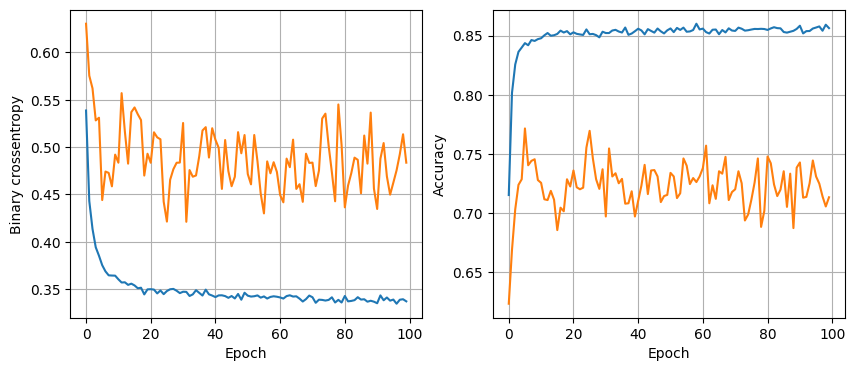

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8630 - loss: 0.3198
16 nodes, dropout 0.2, lr 0.001, batch size 32


KeyboardInterrupt: 

In [32]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [33]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1317
           1       0.88      0.94      0.91      2487

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

Accuracy: 0.8756572029442692
